In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame


In [2]:
nx_df = pd.read_csv('netflix_data.csv')

In [4]:
nx_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [34]:
nx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,2017


In [35]:
nx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
 11  Year_Add      4812 non-null   object
dtypes: int64(2), object(10)
memory usage: 451.3+ KB


**Observation** no missing information 
1) int61 value are columns 'release_year' and 'duration' 
2) 

In [36]:
nx_df['type'].value_counts(normalize=True)

type
Movie      0.971945
TV Show    0.028055
Name: proportion, dtype: float64

In [46]:
columns = ['type', 'country', 'genre']
result = {}

for cols in columns: 
    cols_value_count = nx_df[cols].value_counts()
    cols_percentage = nx_df[cols].value_counts(normalize=True) * 100
    cols_cumulative_percentage = cols_percentage.cumsum()
    result[cols] = pd.DataFrame({'Count': cols_value_count, 
                                 'Percentage': cols_percentage,
                                 'Cumulative Percentage': cols_cumulative_percentage})

result['type']

,Count,Percentage,Cumulative Percentage
type,,,
Movie,4677,97.194514,97.194514
TV Show,135,2.805486,100.000000


In [51]:
result['country'].head(20)

,Count,Percentage,Cumulative Percentage
country,,,
United States,1886,39.193682,39.193682
India,864,17.955112,57.148795
United Kingdom,311,6.463009,63.611804
Canada,155,3.221114,66.832918
France,133,2.763924,69.596841
Spain,112,2.327515,71.924356
Egypt,91,1.891106,73.815461
Turkey,81,1.683292,75.498753
Japan,81,1.683292,77.182045


In [50]:
result['genre'].head(10)

,Count,Percentage,Cumulative Percentage
genre,,,
Dramas,1343,27.909393,27.909393
Comedies,1029,21.384040,49.293433
Action,696,14.463840,63.757273
Children,421,8.748961,72.506234
Documentaries,352,7.315046,79.821280
Stand-Up,283,5.881131,85.702411
Horror Movies,239,4.966750,90.669160
International Movies,100,2.078138,92.747298
Classic Movies,69,1.433915,94.181214


- for genre column: will focus on the top 10 genre that account for 95% of the populatopn  
- for country column: will focus on the top 20 countries that account for 90% of the population  
- for type column: will focus on Movie as its cover 97% of the data  

In [6]:
nx_df['Year_Add'] = nx_df['date_added'].str[-4:]

In [8]:
nx_df['release_year'].value_counts()

release_year
2017    646
2018    624
2016    562
2019    488
2020    379
       ... 
1964      1
1963      1
1946      1
1945      1
1959      1
Name: count, Length: 71, dtype: int64

In [9]:
release_year_count =  nx_df['Year_Add'].value_counts().sort_index()
release_year_count

Year_Add
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     209
2017     754
2018    1114
2019    1337
2020    1229
2021      78
Name: count, dtype: int64

In [10]:
release_year_count.describe()

count      14.000000
mean      343.714286
std       519.338548
min         1.000000
25%         4.000000
50%        32.000000
75%       617.750000
max      1337.000000
Name: count, dtype: float64

<Axes: >

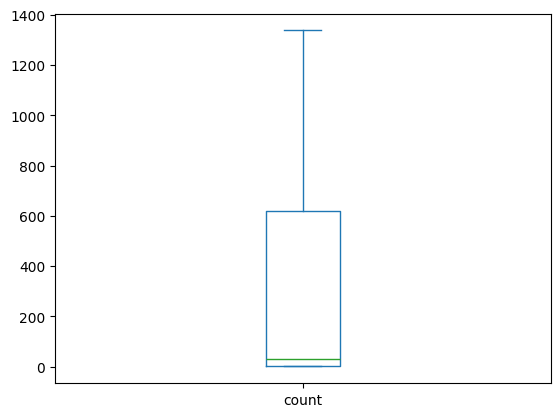

In [11]:
release_year_count.plot.box()


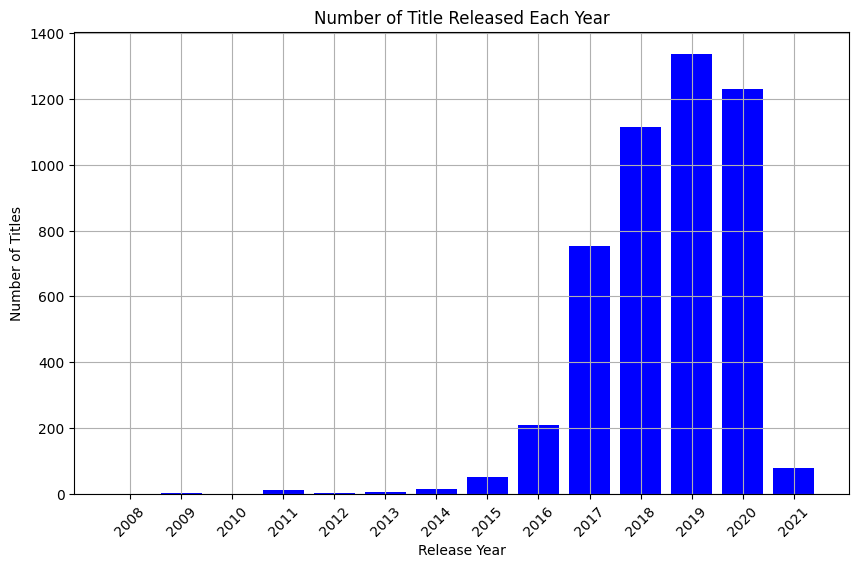

In [12]:
plt.figure(figsize=(10,6))
plt.bar(release_year_count.index, release_year_count.values, color='b') 
plt.title('Number of Title Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [13]:
videos_per_year = nx_df.groupby('Year_Add').size()
videos_per_year

Year_Add
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     209
2017     754
2018    1114
2019    1337
2020    1229
2021      78
dtype: int64

In [14]:
nx_df['type'].value_counts()

type
Movie      4677
TV Show     135
Name: count, dtype: int64

In [15]:
nx_df_movie = nx_df[nx_df['type'] == 'Movie']

In [16]:
nx_df_movie

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas,2018
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children,2020
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas,2020


In [17]:
nx_df_movie['duration'].mean()

102.3846482788112

In [18]:
nx_df_movie['duration'].describe()

count    4677.000000
mean      102.384648
std        26.428435
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [19]:
nx_df_movie_country_genre_index = nx_df_movie.set_index(['country', 'genre'])

In [20]:
nx_df_movie_country_genre_index['duration'].sort_index()

country    genre        
Argentina  Action            82
           Action           115
           Children          60
           Children          85
           Comedies          78
                           ... 
Vietnam    Action            97
           Comedies          92
           Documentaries     93
           Horror Movies    112
Zimbabwe   Comedies         100
Name: duration, Length: 4677, dtype: int64

In [21]:
nx_df_movie_country_genre_index['duration'].sort_index()

country    genre        
Argentina  Action            82
           Action           115
           Children          60
           Children          85
           Comedies          78
                           ... 
Vietnam    Action            97
           Comedies          92
           Documentaries     93
           Horror Movies    112
Zimbabwe   Comedies         100
Name: duration, Length: 4677, dtype: int64

In [22]:
usa_movies = nx_df_movie[nx_df_movie['country'] == 'United States']
usa_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas,2019
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas,2017
11,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,91,Stranded when the Earth is suddenly destroyed ...,Independent Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4793,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,101,Zack and Miri make and star in an adult film t...,Comedies,2018
4802,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,12,Born without legs and stuck in foster care for...,Documentaries,2018
4805,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,158,"A political cartoonist, a crime reporter and a...",Cult Movies,2019
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019


In [23]:
usa_movies['duration'].describe()

count    1856.000000
mean       92.856142
std        23.646186
min         8.000000
25%        82.750000
50%        93.000000
75%       105.000000
max       209.000000
Name: duration, dtype: float64

<Axes: >

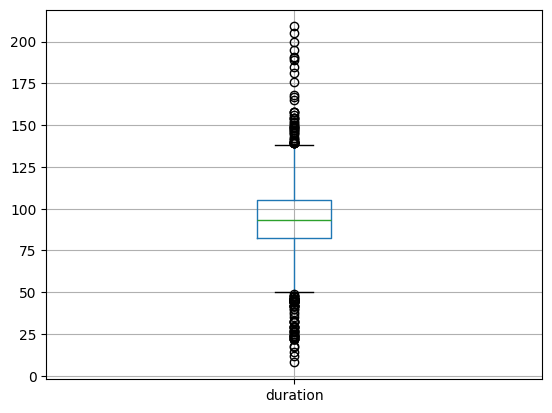

In [24]:
usa_movies.boxplot(['duration'])

In [25]:
usa_movies['genre'].value_counts()

genre
Dramas                374
Comedies              322
Children              271
Action                244
Documentaries         205
Stand-Up              200
Horror Movies         111
Thrillers              40
Classic Movies         35
Uncategorized          15
Independent Movies     13
Music                  10
Cult Movies             8
Sci-Fi                  6
Romantic Movies         2
Name: count, dtype: int64

In [26]:
usa_movies['duration'][usa_movies['genre'] == 'Dramas'].describe()

count    374.000000
mean     104.673797
std       20.784107
min        8.000000
25%       92.000000
50%      102.000000
75%      116.000000
max      209.000000
Name: duration, dtype: float64

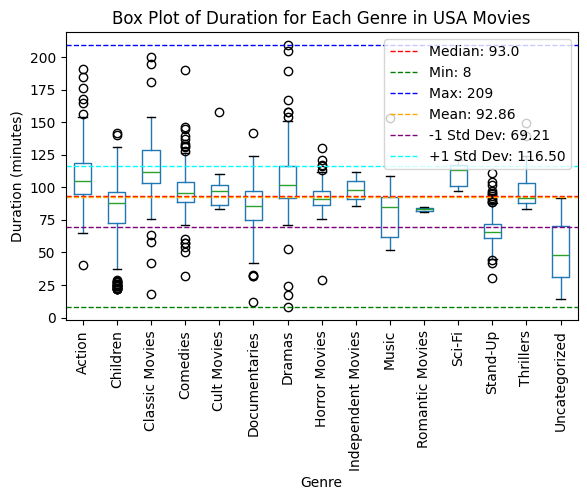

In [27]:
mean_duration = usa_movies['duration'].mean()
std_duration = usa_movies['duration'].std()

# Calculate -1 and +1 standard deviation from the mean
minus_1_std = mean_duration - std_duration
plus_1_std = mean_duration + std_duration

median_duration = usa_movies['duration'].median()
min_duration = usa_movies['duration'].min()
max_duration = usa_movies['duration'].max()

usa_movies.boxplot(column='duration', by='genre', grid=False, rot=45)
plt.axhline(median_duration, color='r', linestyle='--', linewidth=1, label=f'Median: {median_duration}')
plt.axhline(min_duration, color='g', linestyle='--', linewidth=1, label=f'Min: {min_duration}')
plt.axhline(max_duration, color='b', linestyle='--', linewidth=1, label=f'Max: {max_duration}')
plt.axhline(mean_duration, color='orange', linestyle='--', linewidth=1, label=f'Mean: {mean_duration:.2f}')
plt.axhline(minus_1_std, color='purple', linestyle='--', linewidth=1, label=f'-1 Std Dev: {minus_1_std:.2f}')
plt.axhline(plus_1_std, color='cyan', linestyle='--', linewidth=1, label=f'+1 Std Dev: {plus_1_std:.2f}')
plt.title('Box Plot of Duration for Each Genre in USA Movies')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to add more space for x labels
plt.legend()
plt.show()

In [28]:
# Plot the mean trend of each genre over the years
plt.figure(figsize=(14, 8))
for genre in genre_year_stats_unstacked['mean'].columns:
    plt.plot(genre_year_stats_unstacked.index, genre_year_stats_unstacked['mean'][genre], label=genre)

plt.title('Mean Duration Trend of Each Genre Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Duration (minutes)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot the median trend of each genre over the years
# smooth the line by showing the percentage change of duration of each type of movie over the year. 

NameError: name 'genre_year_stats_unstacked' is not defined

<Figure size 1400x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

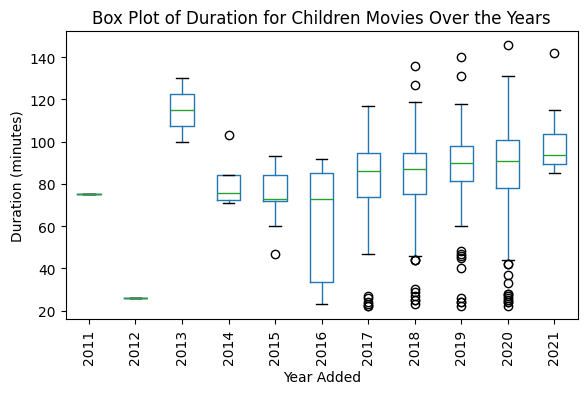

In [29]:
# Filter the DataFrame for entries where the genre is Children
children_movies = nx_df_movie[nx_df_movie['genre'] == 'Children']

# Create a box plot for the duration of children movies over the years
plt.figure(figsize=(12, 8))
children_movies.boxplot(column='duration', by='Year_Add', grid=False, rot=45)
plt.title('Box Plot of Duration for Children Movies Over the Years')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Year Added')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to add more space for x labels
plt.show()

<Figure size 1200x800 with 0 Axes>

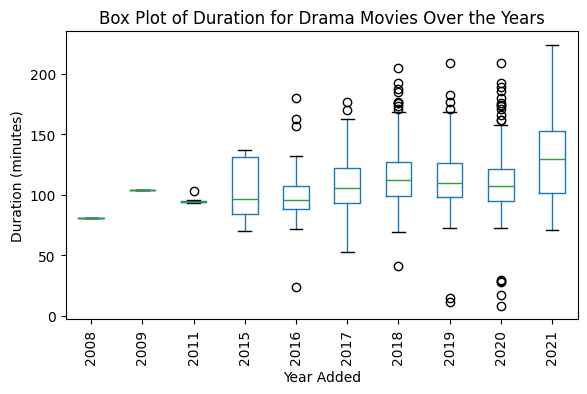

In [30]:
# Filter the DataFrame for entries where the genre is Dramas
drama_movies = nx_df_movie[nx_df_movie['genre'] == 'Dramas']

# Create a box plot for the duration of drama movies over the years
plt.figure(figsize=(12, 8))
drama_movies.boxplot(column='duration', by='Year_Add', grid=False, rot=45)
plt.title('Box Plot of Duration for Drama Movies Over the Years')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Year Added')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to add more space for x labels
plt.show()

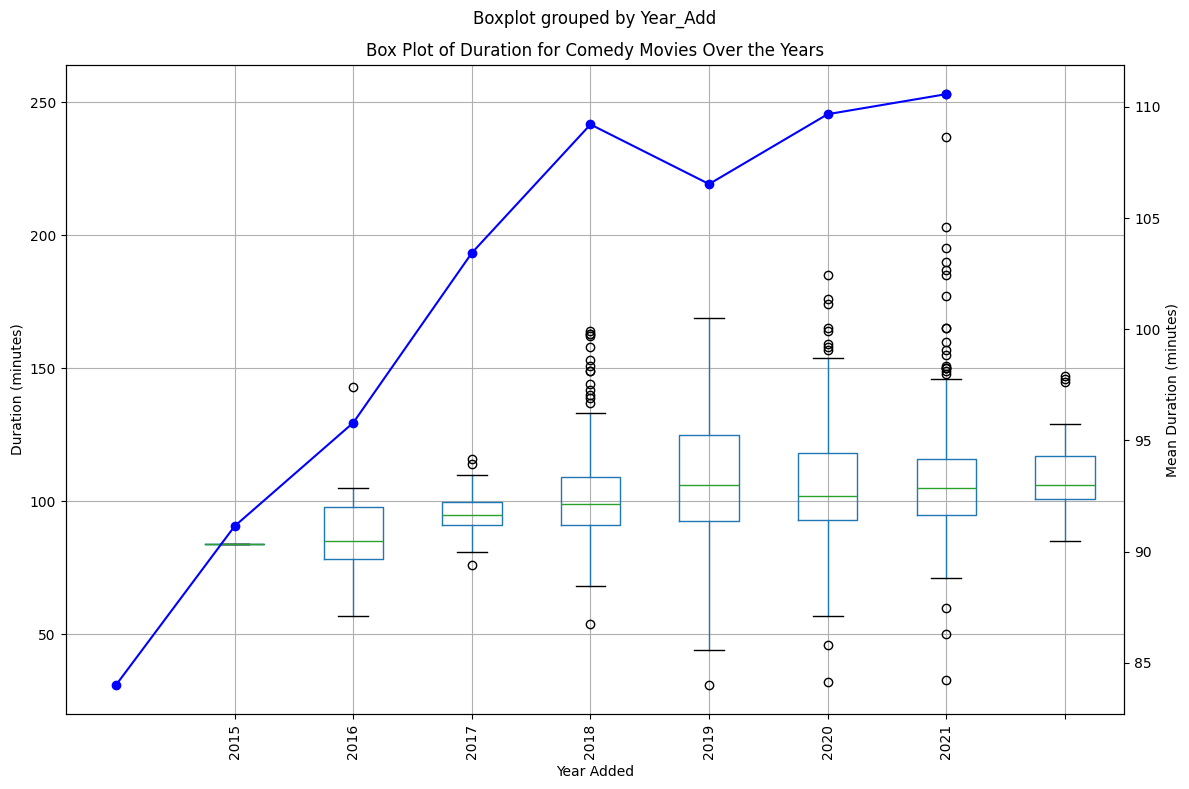

In [31]:
# Filter the DataFrame for entries where the genre is Comedies
comedy_movies = nx_df_movie[nx_df_movie['genre'] == 'Comedies']

# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a box plot for the duration of comedy movies over the years
comedy_movies.boxplot(column='duration', by='Year_Add', grid=False, rot=45, ax=ax1)
ax1.set_title('Box Plot of Duration for Comedy Movies Over the Years')
ax1.set_xlabel('Year Added')
ax1.set_ylabel('Duration (minutes)')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Calculate the percentage change of the mean duration of comedy movies over the years
comedy_mean_duration = comedy_movies.groupby('Year_Add')['duration'].mean()
comedy_mean_duration_pct_change = comedy_mean_duration.pct_change() * 100

# Plot the mean trend over the years on the second y-axis
comedy_mean_duration.plot(kind='line', marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Mean Duration (minutes)')
ax2.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [32]:

country_dfs = {country: nx_df_movie[nx_df_movie['country'] == country] for country in top_20_countries.index}
top_20_countries = nx_df_movie['country'].value_counts().nlargest(20)

NameError: name 'top_20_countries' is not defined

In [108]:
top_20_countries = nx_df_movie[nx_df_movie['country'].isin(top_20_countries.index)]

plt.figure(figsize=(12, 8))
top_20_countries.boxplot(column='duration', by='country', grid=False, rot=45)
plt.title('Box Plot of Duration for Each Country in Top 20 Countries')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Country')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to add more space for x labels
plt.show()

NameError: name 'top_20_countries' is not defined

In [ ]:
# Filter the DataFrame for entries where the country is Argentina
argentina_movies = nx_df_movie[nx_df_movie['country'] == 'Argentina']

argentina_movies
# # Create a box plot for the duration of each genre
# plt.figure(figsize=(12, 8))
# argentina_movies.boxplot(column='duration', by='genre', grid=False, rot=45)
# plt.title('Duration of Movies by Genre in Argentina')
# plt.suptitle('')  # Suppress the default title to avoid overlap
# plt.xlabel('Genre')
# plt.ylabel('Duration (minutes)')
# plt.show()